# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanej biblioteki request), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
url = "https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/"
fileName = "lut.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, "wb").write(r.content)

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

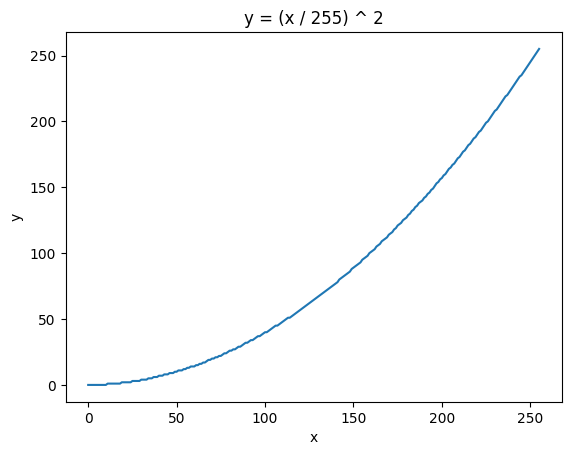

In [5]:
import lut

plt.title("y = (x / 255) ^ 2")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

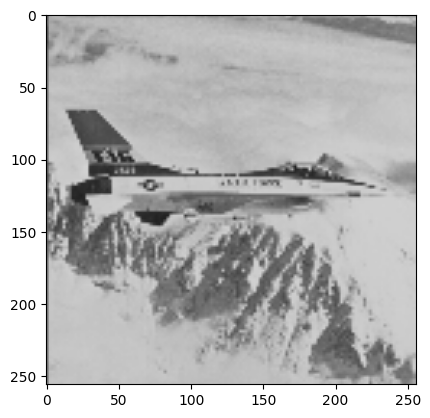

In [6]:
LENA_FILENAME = "lena.bmp"
JET_FILENAME = "jet.bmp"

if not os.path.exists(LENA_FILENAME):
    r = requests.get(url + LENA_FILENAME, allow_redirects=True)
    open(LENA_FILENAME, "wb").write(r.content)

if not os.path.exists(JET_FILENAME):
    r = requests.get(url + JET_FILENAME, allow_redirects=True)
    open(JET_FILENAME, "wb").write(r.content)

jet_image = cv2.imread(JET_FILENAME)

plt.imshow(jet_image)
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

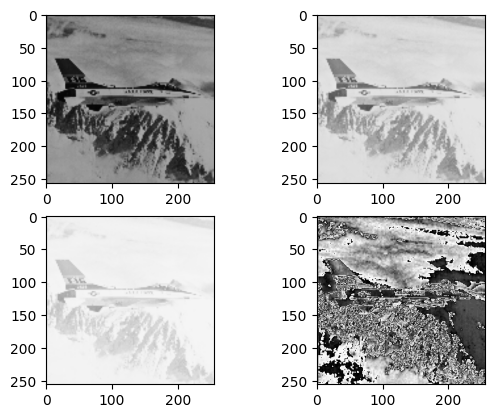

In [7]:
functions = [
    lut.kwadratowa,
    lut.pierwiastkowa,
    lut.log,
    lut.pila,
]
images = [cv2.LUT(jet_image, function) for function in functions]

fig, ax = plt.subplots(nrows=2, ncols=2)
for i, image in enumerate(images):
    ax[i // 2, i % 2].imshow(image)

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [8]:
# from numpy import NDArray
# from cv2.typing import MatLike, NDA


def show_lut(image, lt_function):
    transformed_image = cv2.LUT(image, lt_function)

    fig, ax = plt.subplots(nrows=1, ncols=3)
    ax[0].set_title("lut function")
    ax[0].plot(lt_function)
    ax[0].set_aspect("equal")

    ax[1].set_title("Original image")
    ax[1].imshow(image)

    ax[2].set_title("Transformed image")
    ax[2].imshow(transformed_image)

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

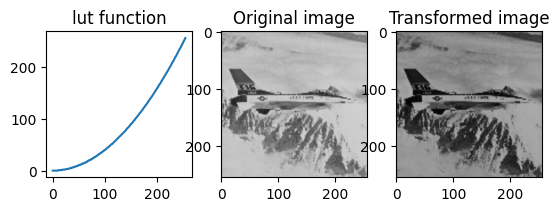

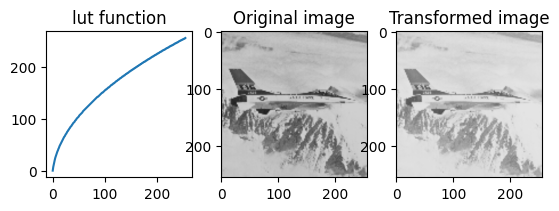

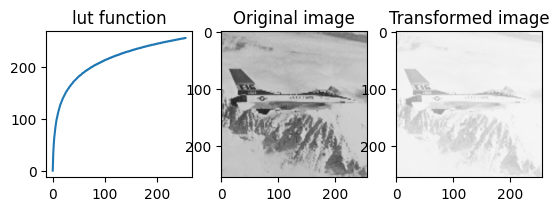

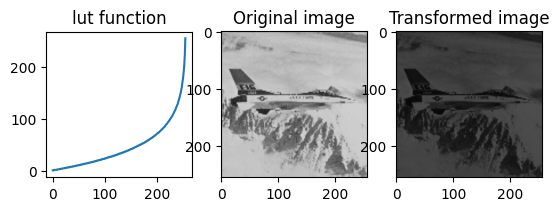

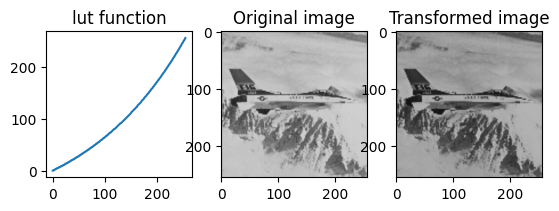

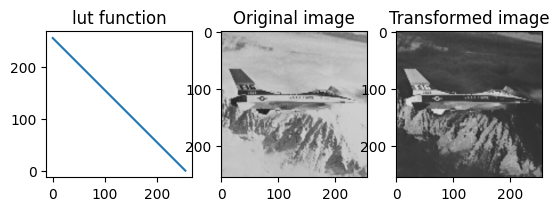

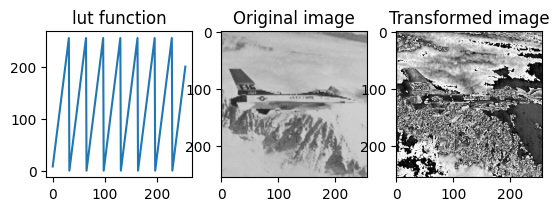

In [9]:
for function in [
    lut.kwadratowa,
    lut.pierwiastkowa,
    lut.log,
    lut.odwlog,
    lut.wykladnicza,
    lut.odwrotna,
    lut.pila,
]:
    show_lut(jet_image, function)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

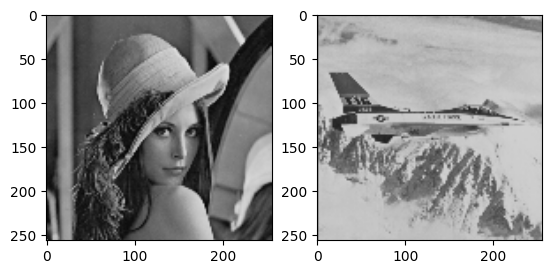

In [10]:
lena_image = cv2.imread(LENA_FILENAME)

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(lena_image)
ax[1].imshow(jet_image)

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

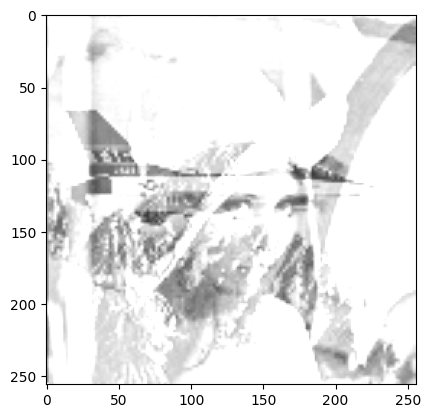

In [11]:
image_sum = cv2.add(lena_image, jet_image)

plt.imshow(image_sum)

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`) dla arguemntów dodawania.
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić.
**Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki.**

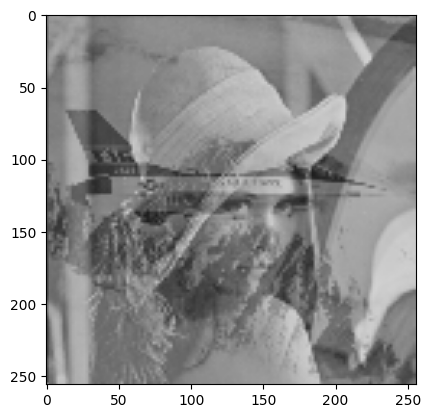

In [12]:
def add_images_and_normalize(image1, image2):
    return (
        cv2.add(
            image1.astype("uint16"),
            image2.astype("uint16"),
        )
        // 2
    )


image_sum = add_images_and_normalize(jet_image, lena_image)
plt.imshow(image_sum)

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

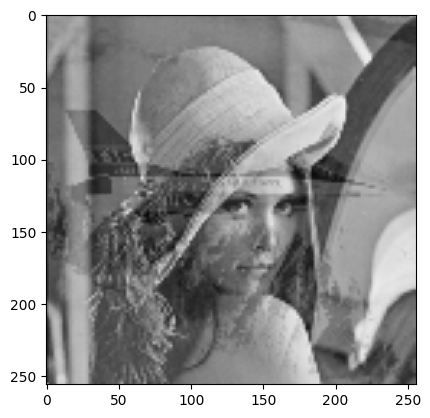

In [13]:
linear_combination = cv2.addWeighted(
    src1=lena_image,
    src2=jet_image,
    alpha=0.8,
    beta=0.4,
    gamma=-20,
)
plt.imshow(linear_combination)

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

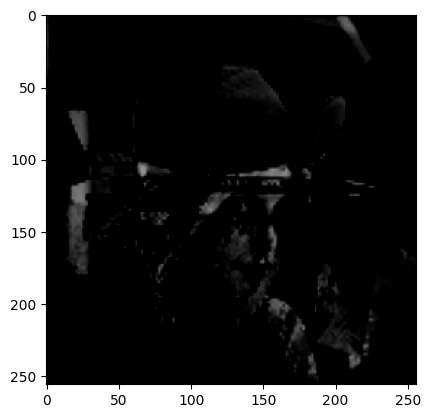

In [14]:
image_difference = cv2.subtract(lena_image, jet_image)

plt.imshow(image_difference)

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ argumentów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

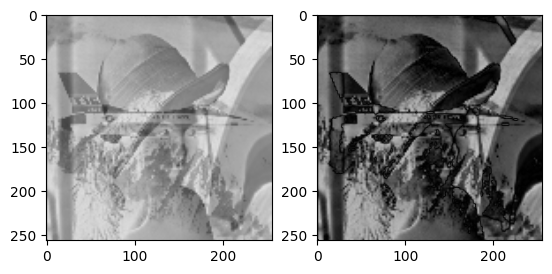

In [15]:
def subtract_images_and_normalize(image1, image2):
    return (
        cv2.subtract(
            image1.astype("int16"),
            image2.astype("int16"),
        )
        + 255
    ) // 2


def subtract_images_and_normalize_abs(image1, image2):
    return np.abs(
        cv2.subtract(
            image1.astype("int16"),
            image2.astype("int16"),
        )
    )


fig, ax = plt.subplots(ncols=2)
ax[0].imshow(subtract_images_and_normalize(jet_image, lena_image))
ax[1].imshow(subtract_images_and_normalize_abs(jet_image, lena_image))

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Przed wykonaniem mnożenia zamień typ arguemntów na **float64**. Wynik mnożenia przeskaluj do zakresu 0-255, a następnie zrzutuj na typ **uint8**.

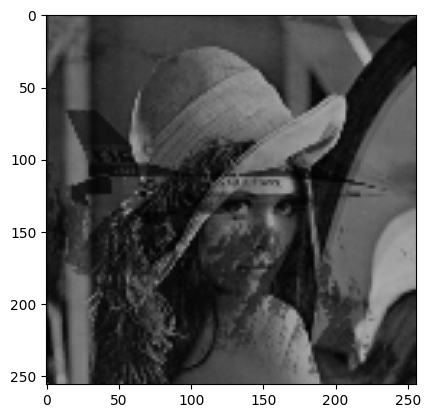

In [16]:
def multiply_image_and_normalize(image1, image2):
    return (
        np.abs(
            cv2.multiply(
                image1.astype("float64"),
                image2.astype("float64"),
            )
        )
        / 255
    ).astype("uint8")


image_product = multiply_image_and_normalize(jet_image, lena_image)

plt.imshow(image_product)

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

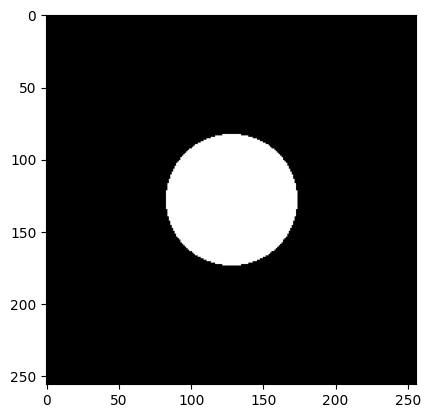

In [17]:
MASK_FILENAME = "kolo.bmp"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, "wb").write(r.content)

mask_image = cv2.imread(MASK_FILENAME)
plt.imshow(mask_image)

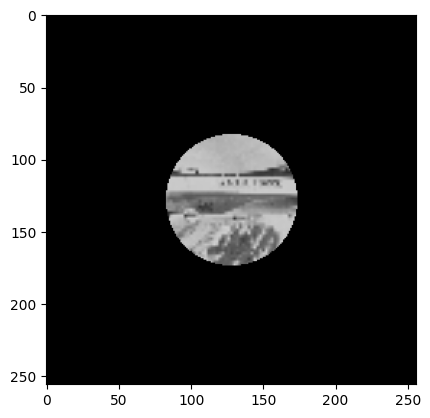

In [18]:
def multiply_image_by_mask(image, mask):
    return cv2.multiply(image, mask.astype("bool").astype("uint8"))


image_with_mask = multiply_image_by_mask(jet_image, mask_image)
plt.imshow(image_with_mask)

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

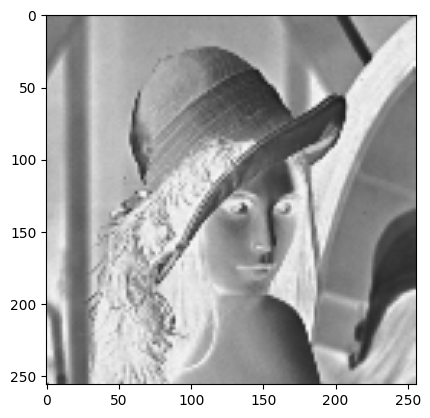

In [19]:
lena_negated = cv2.bitwise_not(lena_image)

plt.imshow(lena_negated)

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

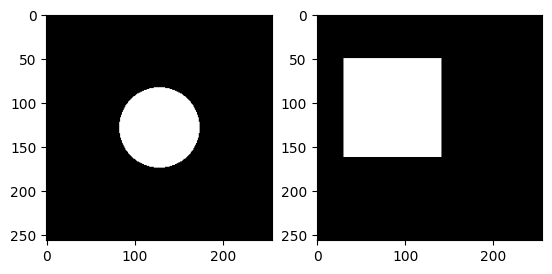

In [20]:
SQUARE_FILENAME = "kwadrat.bmp"
if not os.path.exists(SQUARE_FILENAME):
    r = requests.get(url + SQUARE_FILENAME, allow_redirects=True)
    open(SQUARE_FILENAME, "wb").write(r.content)

circle_image = mask_image
square_image = cv2.imread(SQUARE_FILENAME)

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(circle_image)
ax[1].imshow(square_image)

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

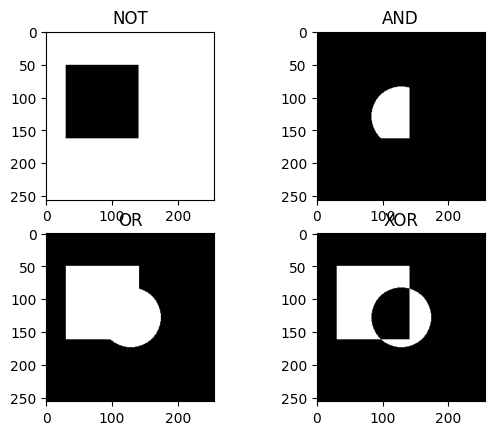

In [21]:
fig, ax = plt.subplots(ncols=2, nrows=2)

for i, (title, image) in enumerate(
    [
        ("NOT", ~square_image),
        ("AND", square_image & circle_image),
        ("OR", square_image | circle_image),
        ("XOR", square_image ^ circle_image),
    ]
):
    axis = ax[i // 2][i % 2]
    axis.set_title(title)
    axis.imshow(image)